In [1]:
#Import essential libraries
import matplotlib.pyplot as plt
import numpy as np
import typy
import pandas as pd
%matplotlib inline
from tqdm import tqdm

In [2]:
#Paralel computing 
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()-2

In [3]:
#Data folder
work_dir = "/work/bansil/s.sevim/0_NbSe2_Work/0.00565"
outfolder="results_GMKG"

In [4]:
#Define data size
nk = 256*256
nq = 3001
q_path = np.arange(nq)
nph = 9

In [5]:
#Fermi energy and convergance parameter
ef = 1.126000
delta=0.0000001

In [6]:
#Initialize data array
ph = np.zeros(shape=(nph,nq))
g_abs = np.zeros(shape=(nph,nq,nk))
g_re = np.zeros(shape=(nph,nq,nk))
g_im = np.zeros(shape=(nph,nq,nk))
e_k = np.zeros(shape=(nq,nk))
e_kq = np.zeros(shape=(nq,nk))

In [7]:
#Load data as pandas object
%time
ph_df = pd.DataFrame()
g_abs_df = pd.DataFrame()
g_re_df = pd.DataFrame()
g_im_df = pd.DataFrame()
e_k_df = pd.DataFrame()
e_kq_df = pd.DataFrame()
for i in tqdm(range(nph)):
    ph_df[i]    = pd.read_csv(f"{work_dir}/{outfolder}/omega/omega_{i+1}.dat", delimiter=' ',header=None)
    g_abs_df[i] = pd.read_csv(f"{work_dir}/{outfolder}/gkk_abs/gkk_{i+1}.dat", delimiter=' ',header=None)
    g_re_df[i]  = pd.read_csv(f"{work_dir}/{outfolder}/gkk_re/gkk_{i+1}.dat", delimiter=' ',header=None)
    g_im_df[i]  = pd.read_csv(f"{work_dir}/{outfolder}/gkk_im/gkk_{i+1}.dat", delimiter=' ',header=None)
e_k_df  = pd.read_csv(f"{work_dir}/{outfolder}/enk/enk_{1}.dat", delimiter=' ',header=None)
e_kq_df = pd.read_csv(f"{work_dir}/{outfolder}/enkq/enkq_{1}.dat", delimiter=' ',header=None)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.77 µs


100%|██████████| 9/9 [12:16<00:00, 81.85s/it]


In [8]:
#fill the predifined arrays with pandas values
%time
for i in range(nph):
    ph[i] = ph_df[i].values.reshape(nq,nk).T[0]
    g_abs[i] = g_abs_df[i].values.reshape(nq,nk)
    g_re[i] = g_re_df[i].values.reshape(nq,nk)
    g_im[i] = g_im_df[i].values.reshape(nq,nk)
e_k = e_k_df.values.reshape(nq,nk)
e_kq = e_kq_df.values.reshape(nq,nk)
g_complex = g_re+1j*g_im

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [9]:
#remove data frames to clean memmory
del ph_df
del g_abs_df
del g_re_df
del g_im_df
del e_k_df
del e_kq_df

In [10]:
#Band symmetry points
sym = np.array([   0, 1116, 1948, 3000])


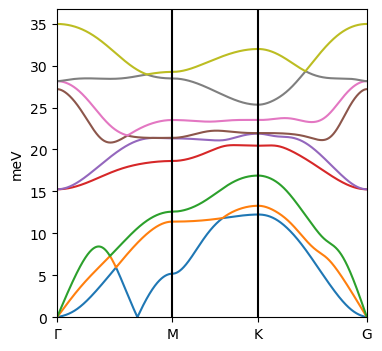

In [12]:
#Untangled band
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylabel(r"meV")
# plt.title(r"$\Omega$")
plt.show()

In [112]:
ph_xs=[]
tolerance = 0.01
pointer = 0
for q in range(int(nq/100),int(nq-nq/100)):
    for i in range(nph):
        for j in range(nph):
            if i<j:
                if abs(ph[i][q]-ph[j][q])<tolerance:
                    if(q!= pointer+1):
                        print(i,j,q)
                        ph_xs.append([i,j,q])
                    pointer = q          

1 2 513
0 1 571
5 6 682
7 8 868
4 5 913
0 1 1602
7 8 2405


In [113]:
temp_ph = typy.untangle(ph,ph_xs)

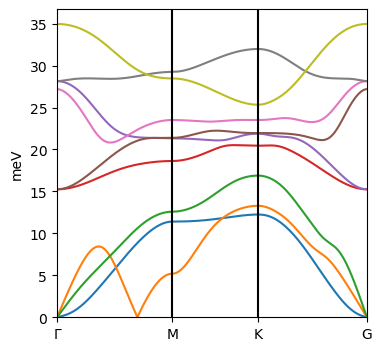

In [127]:
#Untangled band
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(temp_ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylabel(r"meV")
# plt.title(r"$\Omega$")
plt.show()

In [128]:
fixed_g_complex = typy.untangle(g_complex,ph_xs)

In [129]:
fixed_g_complex_mean = (fixed_g_complex*fixed_g_complex.conj()).mean(axis=2)

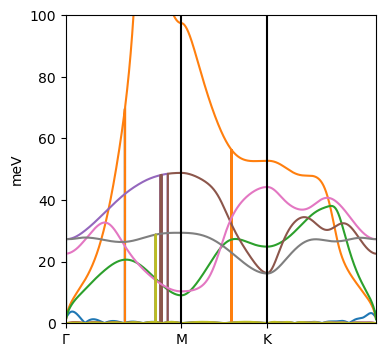

In [130]:
sq = np.sqrt(fixed_g_complex_mean.real)
fig = plt.figure(figsize=(4,4))
for i in range(0,9):
    plt.plot(sq[i],label=i)
plt.xlim(0,nq)
# plt.xticks(sym,["Γ","M","K","G"])
plt.ylabel(r"meV")
# plt.title(r"$\Omega$")
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylim(0,100)
# plt.xlim(900,1000)
# plt.xlim(569,575)
# plt.legend()
plt.xlim(0,nq-3)
plt.show()

In [131]:
g_xs=[]
tolerance = 10
pointer = 0
for q in range(int(nq/100),int(nq-nq/100)):
    for i in range(nph):
        for j in range(nph):
            if i<j:
                if abs(sq[i][q]-sq[i][q-1])>tolerance:
                    if abs(sq[j][q]-sq[j][q-1])>tolerance:
                        print(i,j,q)
                        g_xs.append([i,j,q])

0 1 571
0 1 572
7 8 868
7 8 869
4 5 913
4 5 928
4 5 985
0 1 1602
0 1 1603


In [132]:
g_fix = typy.untangle(sq,g_xs)

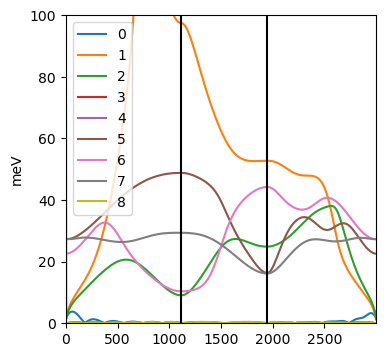

In [133]:
fig = plt.figure(figsize=(4,4))
for i in range(9):
    plt.plot(g_fix[i],label=i)
plt.xlim(0,nq)
# plt.xticks(sym,["Γ","M","K","G"])
plt.ylabel(r"meV")
# plt.title(r"$\Omega$")
# plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylim(0,100)
# plt.xlim(900,1000)
# plt.xlim(569,575)
plt.legend()
plt.xlim(0,nq-3)
# plt.xlim(910,1000)
plt.show()

In [134]:
ph_fix = typy.untangle(temp_ph,g_xs)

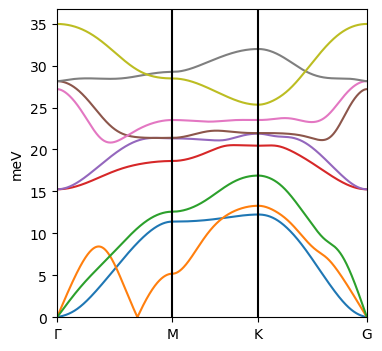

In [135]:
#Untangled band
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(ph_fix[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylabel(r"meV")
# plt.title(r"$\Omega$")
plt.show()

In [2]:
point, path = typy.path_create(1001,np.array([[0.0,0.0,0.0],[0.0,0.5,0.0],[1/3,1/3,0],[0.0,0.0,0.0]]))

In [3]:
point

array([   0,  372,  650, 1001])

In [145]:
  with open("/work/bansil/s.sevim/0_spaces/GMKG_1001.path", 'w') as file:
      file.write(f"{len(path)} crystal \n")
      for i in path:
        file.write(f"{i[0]} {i[1]} {i[2]} 1 \n")

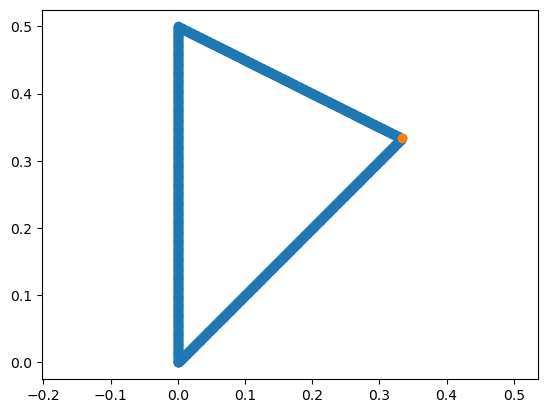

In [149]:
plt.scatter(path.T[0],path.T[1])
plt.scatter(1/3,1/3)
plt.axis('equal')
plt.show()